<h1>Model creation</h1>

<h2>import library</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import pickle

<h2>Load Dataset</h2>

In [2]:
df = pd.read_csv("ml_week2.csv")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


<h2>Feature Selection</h2>

In [3]:
X = X = df[[
    "height",
    "weight",
    "ap_hi",
    "ap_lo",
    "cholesterol",
    "smoke",
    "alco",
    "active"
]]

y = df['cardio']

<h2>Train-Test Split</h2>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (54754, 8)
Testing Shape: (13689, 8)


<h2>Feature Scaling</h2>

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Logistic Regression (From Scratch)</h2>

In [6]:
class LogisticRegressionScratch:

    def __init__(self, lr=0.01, n_iters=3000):
        self.lr = lr
        self.n_iters = n_iters

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = -np.mean(
                y*np.log(y_pred + 1e-8) +
                (1-y)*np.log(1 - y_pred + 1e-8)
            )
            self.losses.append(loss)

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

<h2>Train Model</h2>

In [7]:
model = LogisticRegressionScratch(lr=0.01, n_iters=3000)
model.fit(X_train, y_train)
print("Training Completed")

Training Completed


<h2>Predictions</h2>

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)


<h2>Metrics</h2>

In [9]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Training Accuracy: 0.7251525002739526
Testing Accuracy: 0.7192636423405654
Precision: 0.7568469101123596
Recall: 0.6368739843403752
F1 Score: 0.691696750902527


<h2>ROC curve</h2>

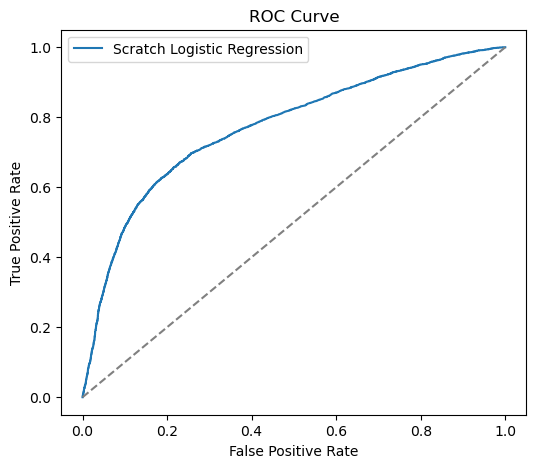

AUC Score: 0.7717106824976496


In [10]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Scratch Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_test_proba))

<h1>Overfitting / Underfitting Check</h1>

In [11]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

if train_acc > test_acc + 0.1:
    print("Overfitting")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Underfitting")
else:
    print("Good Fit")

Good Fit


<h2>save model data</h2>

In [12]:
import pickle

# Create the data dictionary the app expects
model_data = {
    "weights": model.weights,
    "bias": model.bias,
    "scaler": scaler  # This includes the fitted StandardScaler
}

with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model and Scaler saved successfully for deployment.")

Model and Scaler saved successfully for deployment.
